## Import Library

In [120]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Import Image

In [121]:
citra = cv2.imread("foto_nama.jpg")

## Konversi Image From BGR to RGB

In [122]:
img_rgb = cv2.cvtColor(citra, cv2.COLOR_BGR2RGB)

## Menampilkan Image RGB serta Deteksi Saluran Warna

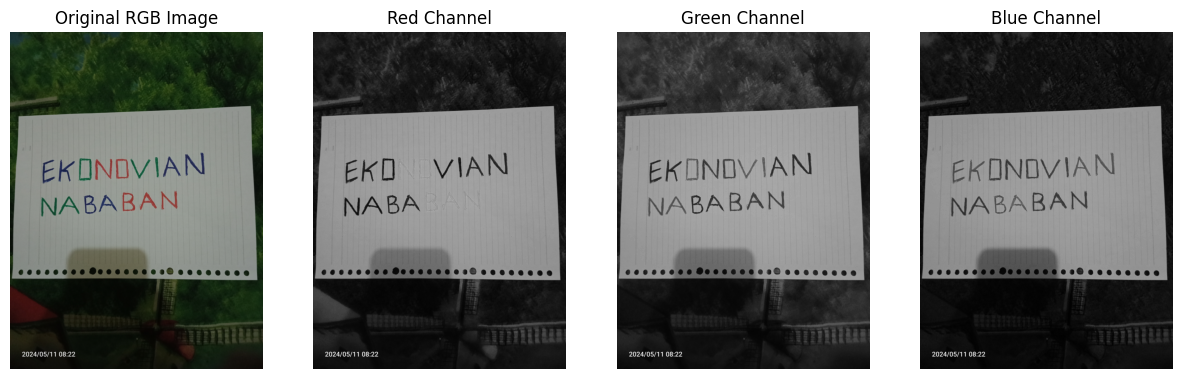

In [123]:
# Pisahkan saluran warna
red_channel = img_rgb[:,:,0]
green_channel = img_rgb[:,:,1]
blue_channel = img_rgb[:,:,2]

# Tampilkan masing-masing saluran warna sebagai citra grayscale 
plt.figure(figsize=(15, 5))

# Subplot pertama: Menampilkan citra RGB asli
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image') # Judul subplot
plt.axis('off') # Menonaktifkan sumbu x dan y

# Subplot kedua: Menampilkan saluran warna merah
plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Subplot ketiga: Menampilkan saluran warna hijau
plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Subplot keempat: Menampilkan saluran warna biru
plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Menampilkan plot
plt.show()

## Menampilkan Histogram dari Image RGB dan Setiap Saluran Warnanya

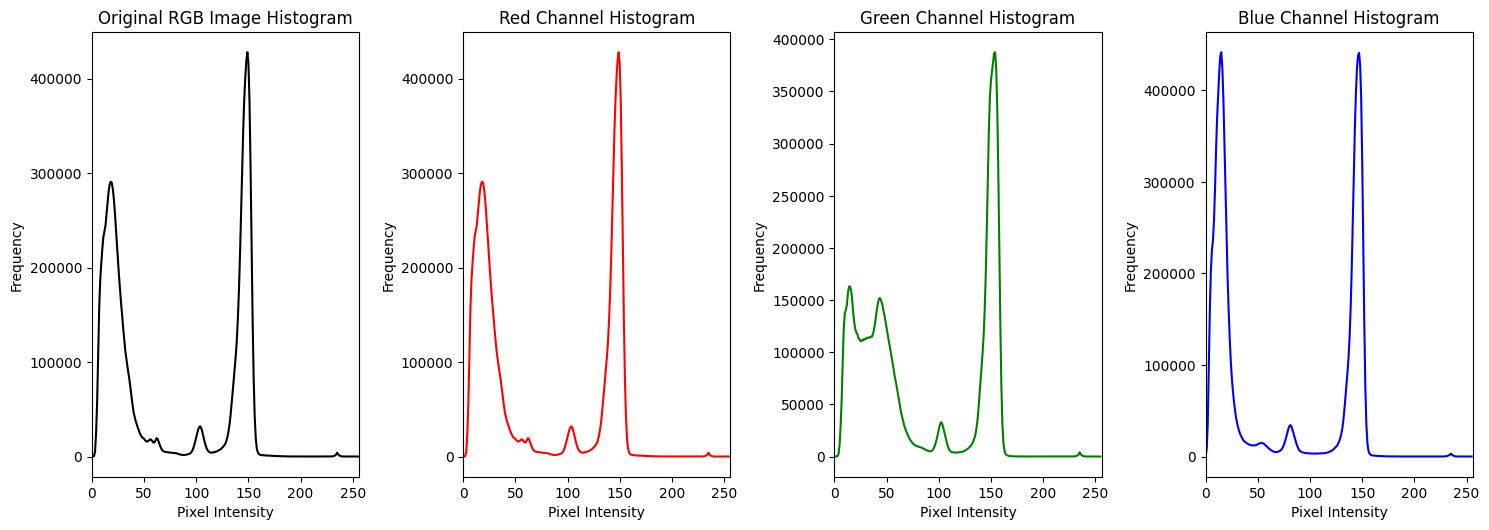

In [124]:
# Hitung histogram untuk setiap saluran warna
red_hist = cv2.calcHist([red_channel],[0],None,[256],[0,256])
green_hist = cv2.calcHist([green_channel],[0],None,[256],[0,256])
blue_hist = cv2.calcHist([blue_channel],[0],None,[256],[0,256])
original_hist = cv2.calcHist([img_rgb],[0],None,[256],[0,256])

# Menampilkan histogram
plt.figure(figsize=(15, 10))

# Subplot pertama: Menampilkan Histogram citra RGB asli
plt.subplot(2, 4, 1)
plt.plot(original_hist, color='black')
plt.title('Original RGB Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Subplot kedua: Menampilkan histogram saluran warna merah
plt.subplot(2, 4, 2)
plt.plot(red_hist, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Subplot ketiga: Menampilkan histogram saluran warna hijau
plt.subplot(2, 4, 3)
plt.plot(green_hist, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Subplot keempat: Menampilkan histogram saluran warna biru
plt.subplot(2, 4, 4)
plt.plot(blue_hist, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Menampilkan Plot
plt.tight_layout()
plt.show()

## Mencari Nilai Ambang Batas untuk Menampilkan Kategori Warna pada Citra

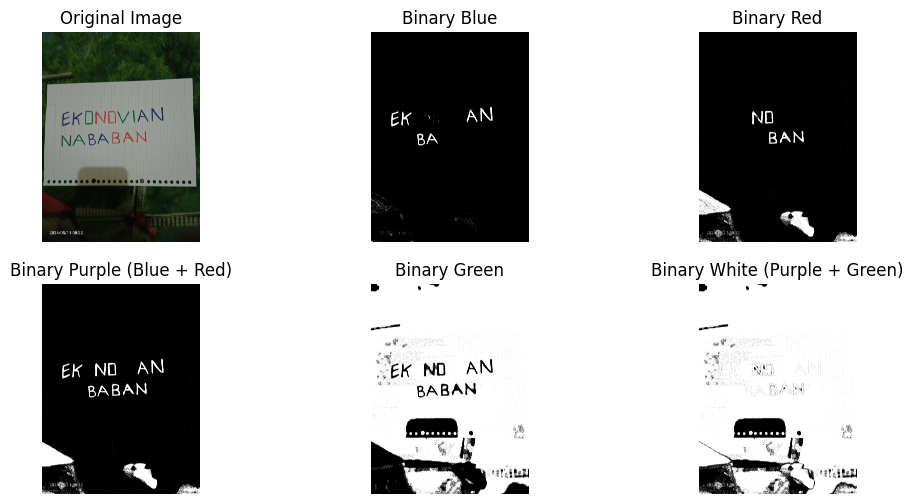

In [125]:
# Load citra
img = cv2.imread('foto_nama.jpg')

# Konversi citra ke ruang warna HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Pisahkan saluran warna Hue (H), Saturation (S), dan Value (V)
hue_channel = hsv_img[:, :, 0]
saturation_channel = hsv_img[:, :, 1]
value_channel = hsv_img[:, :, 2]

# Cari nilai ambang batas untuk warna biru
_, binary_blue = cv2.threshold(hue_channel, 100, 255, cv2.THRESH_BINARY)

# Gabungkan saluran hue dan saluran value untuk mendapatkan warna merah
red_threshold_low = 0
red_threshold_high = 20
binary_red = cv2.inRange(hue_channel, red_threshold_low, red_threshold_high)

# Gabungkan saluran biru dan merah untuk mendapatkan warna ungu (biru dan merah)
binary_purple = cv2.bitwise_or(binary_blue, binary_red)

# Gabungkan saluran hue dan saluran value untuk mendapatkan warna hijau
green_threshold_low = 40
green_threshold_high = 80
binary_green = cv2.inRange(hue_channel, green_threshold_low, green_threshold_high)

# Gabungkan saluran biru, merah, dan hijau untuk mendapatkan warna putih
binary_white = cv2.bitwise_or(binary_purple, binary_green)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(binary_blue, cmap='gray')
plt.title('Binary Blue')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(binary_red, cmap='gray')
plt.title('Binary Red')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(binary_purple, cmap='gray')
plt.title('Binary Purple (Blue + Red)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(binary_green, cmap='gray')
plt.title('Binary Green')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(binary_white, cmap='gray')
plt.title('Binary White (Purple + Green)')
plt.axis('off')

plt.show()
